In [104]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.stats import LombScargle
import astropy

In [105]:
# Generate a sample lightcurve with times t, magnitudes y, and errors dy with noisy data

rand = np.random.RandomState(42) 
#expose a number of methods for generating random numbers drawn from a variety of probability distributions 
t = 100 * rand.rand(100) #Random values in a given shape
y = np.sin(2 * np.pi * t) + 0.1 * rand.randn(100) # Return a sample (or samples) from the "standard normal" distribution.
dy = 0.1 * (1 + rand.rand(100))

Text(0, 0.5, 'Flux')

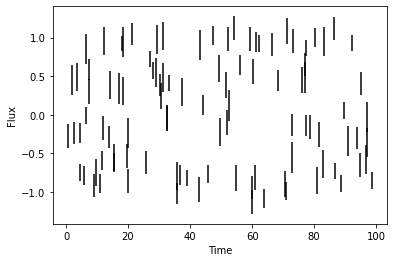

In [106]:
plt.errorbar(t, y, dy, ls = 'none', c = 'k')
plt.xlabel('Time')
plt.ylabel('Flux')

#raw light curve, unphased 

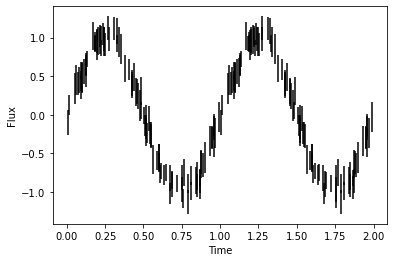

In [107]:
#Phase folding, assuming the period, and computing what phase each timestampos corresponds to between 0 and 1. Below we fold our lightcurve with period equal to 1. 

def phase_fold(t, y, dy, period):
    phases = np.remainder(t, period)/period #Return element-wise remainder of division.
    phases = np.concatenate((phases, phases + 1)) #Join a sequence of arrays along an existing axis.
    y = np.concatenate((y,y))
    dy = np.concatenate((dy,dy))
    plt.errorbar(phases, y, dy, ls='none', c='k')
    plt.xlabel('Time')
    plt.ylabel('Flux')

phase_fold(t, y, dy, 1)

#chopping light curve into segments, folding light curve and phase it to the trial period 


In [108]:
'''Function below returns the best period, power spectrum(strength of signal) at different frequencies. In reality we don't know the period beforehand so we find it using an algorithm known as Lomb-Scargle'''



"Function below returns the best period, power spectrum(strength of signal) at different frequencies. In reality we don't know the period beforehand so we find it using an algorithm known as Lomb-Scargle"

1.9987063533134721

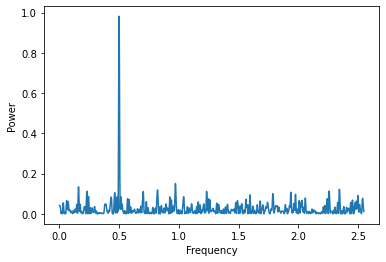

In [109]:
'''Light Curve using Lomb-Scargle, taking it and decomposing it into the frequencies that have the most power, figure tell us the the power of the spectrum'''

period = 2

rand = np.random.RandomState(42)
t = 100 * rand.rand(100)
y = np.sin(2 * np.pi / period * t) + 0.1 * rand.randn(100)
dy = 0.1 * (1 + rand.rand(100))

def lomb_scargle(t, y, dy):

    frequency, power = astropy.timeseries.LombScargle(t, y, dy).autopower()
    plt.plot(frequency, power)
    #plt.show()
    plt.xlabel('Frequency')
    plt.ylabel('Power')

    return 1 / frequency[(np.argmax(power))] #Returns the indices of the maximum values along an axis.

lomb_scargle(t, y, dy)

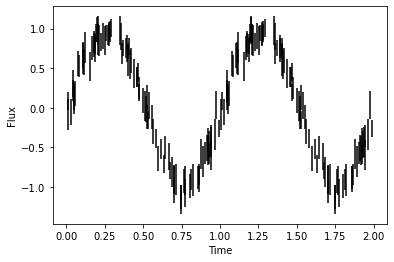

In [110]:
#phase folding, using LS to search for the best period of our LC, and automatically plot the phase folder LC of the object. 

period = 0.5

rand = np.random.RandomState(42)
t = 100 * rand.rand(100)
y = np.sin(2 * np.pi / period * t) + 0.1 * rand.randn(100)
dy = 0.1 * (1 + rand.rand(100))

def lomb_scargle(t, y, dy):

    frequency, power = astropy.timeseries.LombScargle(t, y, dy).autopower()
    #plt.plot(frequency, power)
    #plt.show()
    #plt.xlabel('Frequency')
    #plt.ylabel('Power')

    return 1 / frequency[np.argmax(power)]

def plot_best_period(t, y, dy):
    phase_fold(t, y, dy, lomb_scargle(t, y, dy))

plot_best_period (t, y, dy)

In [111]:
from scipy.signal import fftconvolve
from scipy import fftpack
from matplotlib import mlab
from scipy.fftpack import fft
from scipy.stats import norm 

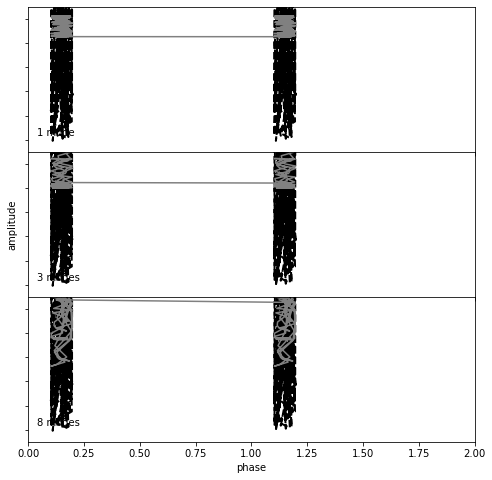

In [112]:
#Method 2 - Fourier Analysis- set of sine curves are going to be fitted to the data, each trial the function is fitted with linear least-squares to the LC data. 
#n orders - 3 or 4 

rand = np.random.RandomState(42)
t = 100 * rand.rand(100)
y = np.sin(2 * np.pi / period * t) + 0.1 * rand.randn(100)
dy = 0.1 * (1 + rand.rand(100))

fig=plt.figure(figsize=(8,8))
fig.subplots_adjust(hspace=0)

kvals=[1, 3, 8]
subplots=[311, 312, 313]

for (k, subplot) in zip(kvals, subplots):
    ax = fig.add_subplot(subplot)

    # Use FFT to fit a truncated Fourier series
    y_fft = np.fft.fft(y)
    y_fft[k + 1:-k] = 0
    y_fit = np.fft.ifft(y_fft).real

    # plot the true value and the k-term reconstruction
    ax.plot(np.concatenate([dy, 1 + dy]),
            np.concatenate([y, y]), '--k', lw=2)
    ax.plot(np.concatenate([dy, 1 + dy]),
            np.concatenate([y_fit, y_fit]), color='gray')

    label = "%i mode" % k
    if k > 1:
        label += 's'

    ax.text(0.02, 0.1, label, ha='left', va='bottom',
            transform=ax.transAxes)

    if subplot == subplots[-1]:
        ax.set_xlabel('phase')
    else:
        ax.xaxis.set_major_formatter(plt.NullFormatter())

    if subplot == subplots[1]:
        ax.set_ylabel('amplitude')
    ax.yaxis.set_major_formatter(plt.NullFormatter())

    ax.set_xlim(0, 2)
    ax.set_ylim(1.1, -0.1)

plt.show()

In [113]:


#generate data
random = np.random.seed(1)
x = np.linspace(0, 1, 500)
h = 0.01
C = np.exp(-0.5 * (x - x[:, None]) **2 / h **2)
y = 0.8 +0.3 * np.random.multivariate_normal(np.zeros(len(x)), C)

# define function
w = np.zeros_like(x)
w[(x > 0.12) & (x < 0.28)] = 1

(0.0, 2.0)

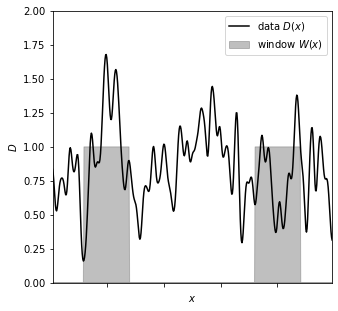

In [114]:
#Set up the plots
fig = plt.figure(figsize=(5,5))
ax1 = fig.add_subplot(111)

#plot the data and window function
ax1.plot(x, y, '-k', label=r'data $D(x)$')
ax1.fill(x, w, color='gray', alpha=0.5,
        label=r'window $W(x)$')
ax1.fill(x, w[::-1], color='gray', alpha=0.5)

ax1.legend()
ax1.xaxis.set_major_formatter(plt.NullFormatter())

ax1.set_xlabel('$x$')
ax1.set_ylabel('$D$')

ax1.set_xlim(0.01, 0.99)
ax1.set_ylim(0.0, 2.0)

In [115]:
#Compute the Fourier transform of the signal and window

y_fft = np.fft.fft(y)
w_fft = np.fft.fft(w)

yw_fft = y_fft * w_fft
yw_final = np.fft.ifft(yw_fft)

Text(0.5, 0, '$x$')

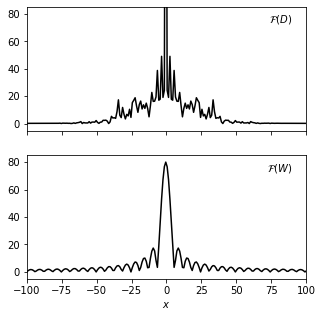

In [116]:
#show Fourier transform result of two functions

# Set up the plots
fig = plt.figure(figsize=(5, 5))

# plot the Fourier transforms
N = len(x)
k = - 0.5 * N + np.arange(N) * 1. / N / (x[1] - x[0])

ax = fig.add_subplot(211)
ax.plot(k, abs(np.fft.fftshift(y_fft)), '-k')

ax.text(0.95, 0.95, r'$\mathcal{F}(D)$',
        ha='right', va='top', transform=ax.transAxes)

ax.set_xlim(-100, 100)
ax.set_ylim(-5, 85)

ax.xaxis.set_major_formatter(plt.NullFormatter())

ax = fig.add_subplot(212)
ax.plot(k, abs(np.fft.fftshift(w_fft)), '-k')

ax.text(0.95, 0.95,  r'$\mathcal{F}(W)$', ha='right', va='top',
        transform=ax.transAxes)

ax.set_xlim(-100, 100)
ax.set_ylim(-5, 85)

ax.set_xlabel('$x$')

In [118]:
rand = np.random.default_rng(42)
t = 100 * rand.random(100)
y = np.sin(2 * np.pi * t) + rand.standard_normal(100)
dy = 0.1 * (1 + rand.standard_normal(100))

In [121]:
from astropy.timeseries import LombScargle
frequency, power = astropy.timeseries.LombScargle(t, y, dy).autopower()
frequency[np.argmax(power)]

1.574990055388798

In [122]:
freq = np.arange(0.8, 1.3, 0.1)
LombScargle(t, y).power(freq)

array([0.0792948 , 0.01778874, 0.25328167, 0.01064157, 0.01471387])

In [125]:
from astropy import units as u

t = t * u.s
y = y * u.mag
frequency, power = astropy.timeseries.LombScargle(t, y).autopower()
frequency.unit
power.unit

Unit(dimensionless)